In [2]:
!which python

/bin/bash: /home/shiya/anaconda3/envs/music/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/shiya/anaconda3/envs/music/bin/python


In [20]:
import librosa
import librosa.display
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import os 


import spectrogram
from spectrogram import generate_spec
from spectrogram import truncate_spec

In [5]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-07-04 20:25:15.504784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 20:25:15.533911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 20:25:15.534360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [6]:
import librosa

# 1. Get the file path to an included audio example
filename = librosa.example('nutcracker')


# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)
print(y)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)


[ 2.2716861e-06  5.3327208e-06 -7.2473290e-06 ...  1.1170751e-05
  1.2871884e-06  5.4120628e-06]
Estimated tempo: 107.67 beats per minute


In [7]:
y, sr = librosa.load(librosa.ex('trumpet'))
spec = librosa.feature.melspectrogram(y=y, sr=sr) 

In [8]:
y.shape

(117601,)

In [9]:
print(sr)

22050


<AxesSubplot:>

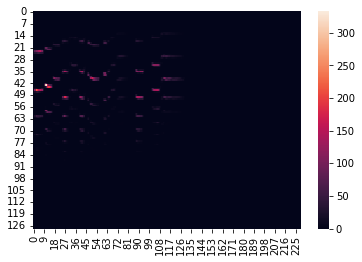

In [10]:
sns.heatmap(spec)

/home/shiya/anaconda3/envs/music/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


<AxesSubplot:>

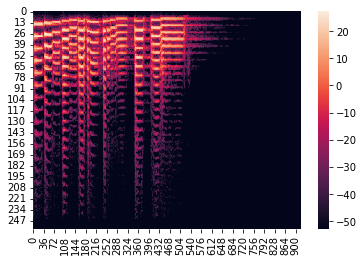

In [11]:
sns.heatmap(librosa.amplitude_to_db(librosa.stft(y, n_fft = 512)), cmap = 'rocket')

print(librosa.stft.__doc__)

In [12]:
hop_length = 4096
win_length = 1024
n_fft = 1024

In [13]:
%%time
spectrogram.generate_spec('PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', hop_length = hop_length, 
                win_length = win_length, n_fft = n_fft).shape

CPU times: user 4.78 ms, sys: 66.3 ms, total: 71.1 ms
Wall time: 140 ms


(513, 202)

In [14]:
%%time 
sample_raw, _ =librosa.load('../data/_OrchideaSOL2020_release/OrchideaSOL2020/PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 3.33 s, sys: 115 ms, total: 3.44 s
Wall time: 1.54 s


In [21]:
print(scipy.stats.iqr(sample_raw))

0.00021132442270754836


In [64]:
test = np.array([2, 4, 6, 8, 10])
scipy.convolve(test,np.ones(5,dtype='float')/5, 'same')

/tmp/ipykernel_10651/1454046401.py:2: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  scipy.convolve(test,np.ones(5,dtype='float')/5, 'same')


array([2.4, 4. , 6. , 5.6, 4.8])

In [65]:
def rolling_mean(arr, win):
    return scipy.convolve(arr, np.ones(win, dtype = 'float')/win, 'same')

In [107]:
def get_signal_range(arr):
    tmp = rolling_mean(arr, 100) < 0.001
    rolling_tmp = [all(tmp[x:x+500]) for x in range(len(tmp) - 500)]
    # plt.scatter(range(len(rolling_tmp)), rolling_tmp)
    for i in range(len(rolling_tmp)):
        if rolling_tmp[i] == True:
            return i

In [109]:
%%time
print(get_signal_range(sample_raw))

/tmp/ipykernel_10651/4247337007.py:2: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  return scipy.convolve(arr, np.ones(win, dtype = 'float')/win, 'same')


27590
CPU times: user 5.14 s, sys: 4.01 ms, total: 5.14 s
Wall time: 5.14 s


/tmp/ipykernel_10651/4247337007.py:2: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  return scipy.convolve(arr, np.ones(win, dtype = 'float')/win, 'same')


(0.0, 1000.0)

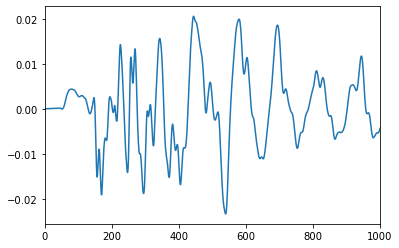

In [69]:
plt.plot(rolling_mean(sample_raw, 100))
plt.xlim(0, 1000)

(0.0, 1000.0)

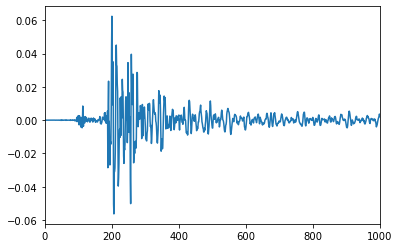

In [49]:
plt.plot(np.diff(sample_raw, 2))
plt.xlim(0, 1000)

5.545808e-07


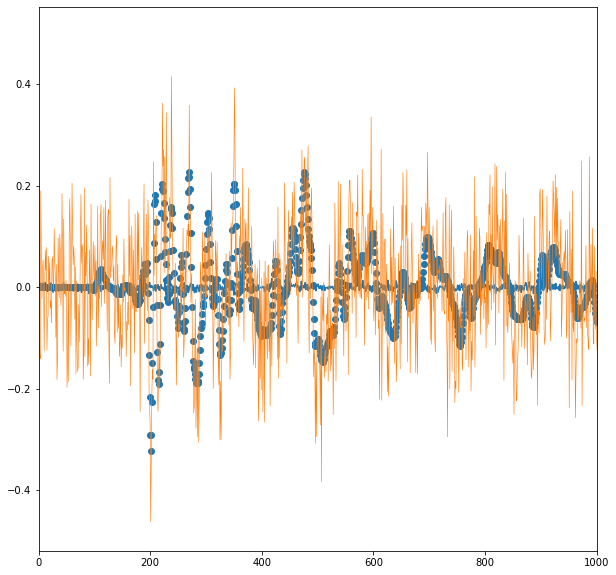

In [112]:
plt.figure(figsize=(10, 10))
plt.scatter(range(len(sample_raw)), sample_raw)
print(sample_raw.mean())
plt.xlim((0, 1000))
plt.plot(np.random.normal(0, sample_raw.std(), size = 1000))
plt.plot(sample_raw + np.random.normal(0, 0.1, size = sample_raw.shape), linewidth= 0.6, 
           linestyle = '-')

In [23]:
type(sample_raw)

numpy.ndarray

In [11]:
%%time
sample = spectrogram.generate_spec('PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', hop_length = hop_length, 
                win_length = win_length, n_fft = n_fft)

CPU times: user 22.1 ms, sys: 41 ms, total: 63.1 ms
Wall time: 130 ms


Text(0.5, 1.0, 'Log-frequency power spectrogram')

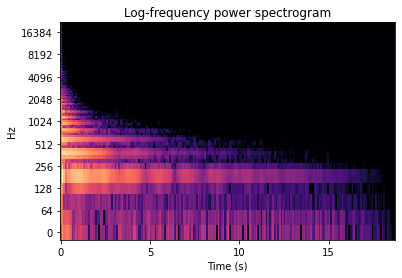

In [12]:
fig = plt.figure()
D = librosa.amplitude_to_db(sample,
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=44100, hop_length=hop_length,
                         x_axis='s')
plt.title('Log-frequency power spectrogram')

In [13]:
sample.shape

(513, 202)

In [15]:
tf.data.Dataset.from_tensor_slices(sample)

2022-07-04 16:40:12.645809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-04 16:40:12.647580: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:40:12.648193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:40:12.649168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

<TensorSliceDataset element_spec=TensorSpec(shape=(404,), dtype=tf.float32, name=None)>

In [16]:
librosa.stft(y, n_fft = 512)

array([[ 2.1919990e-03+0.0000000e+00j, -1.4984594e-03+0.0000000e+00j,
        -3.7925106e-03+0.0000000e+00j, ...,
         2.3942404e-08+0.0000000e+00j, -1.0389048e-07+0.0000000e+00j,
        -1.2857109e-06+0.0000000e+00j],
       [-5.7481867e-03-4.3230206e-03j,  5.6010368e-03-3.8339014e-04j,
        -4.0086496e-04+5.5423792e-04j, ...,
         3.1411400e-08-8.3640463e-09j, -5.0904543e-08-4.7256105e-08j,
         5.4454540e-07-1.1114313e-06j],
       [ 1.4769356e-02+2.3543192e-03j, -1.0303578e-02-1.2755980e-02j,
        -8.4517188e-03+1.0901684e-02j, ...,
         4.4940474e-08-2.8125244e-09j, -6.4107148e-08-7.2129964e-08j,
         7.4693628e-07+9.8385283e-07j],
       ...,
       [-7.2194997e-04+2.3245620e-05j,  3.5452374e-04-1.9947761e-06j,
         1.4692579e-06+1.2078042e-06j, ...,
        -2.5920308e-04+1.0048603e-04j,  2.7742214e-04-3.2669326e-04j,
        -1.3921515e-04+2.6892315e-04j],
       [ 7.3494151e-04-1.2279861e-05j, -6.8163592e-07-3.6527147e-04j,
        -7.4732316e-06

In [17]:
meta_df = pd.read_csv('../data/OrchideaSOL_metadata.csv')
meta_df.head()

,Path,Family (abbr.),Family (in full),Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID (if applicable),Dynamics,Dynamics ID (if applicable),Instance ID,Mute (abbr.),Mute (in full),String ID (if applicable),Needed digital retuning,Fold
0,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#0,22.0,f,3.0,0.0,S,Sordina,NaN,False,2
1,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#0,22.0,p,1.0,0.0,S,Sordina,NaN,True,0
2,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#1,34.0,f,3.0,0.0,S,Sordina,NaN,True,1
3,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#1,34.0,p,1.0,0.0,S,Sordina,NaN,True,2
4,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#2,46.0,f,3.0,0.0,S,Sordina,NaN,True,1


In [18]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13265 entries, 0 to 13264
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Path                         13265 non-null  object 
 1   Family (abbr.)               13265 non-null  object 
 2   Family (in full)             13265 non-null  object 
 3   Instrument (abbr.)           13265 non-null  object 
 4   Instrument (in full)         13265 non-null  object 
 5   Technique (abbr.)            13265 non-null  object 
 6   Technique (in full)          13265 non-null  object 
 7   Pitch                        13265 non-null  object 
 8   Pitch ID (if applicable)     13162 non-null  float64
 9   Dynamics                     13265 non-null  object 
 10  Dynamics ID (if applicable)  12646 non-null  float64
 11  Instance ID                  13262 non-null  float64
 12  Mute (abbr.)                 13265 non-null  object 
 13  Mute (in full)  

In [19]:
meta_df.describe()

,Pitch ID (if applicable),Dynamics ID (if applicable),Instance ID,String ID (if applicable),Fold
count,13162.000000,12646.000000,13262.000000,7516.000000,13265.000000
mean,63.842653,2.073857,0.848138,2.360298,2.000000
std,16.512067,1.329919,1.177874,1.196041,1.414267
min,20.000000,0.000000,0.000000,1.000000,0.000000
25%,52.000000,2.000000,0.000000,1.000000,1.000000
50%,64.000000,2.000000,0.000000,2.000000,2.000000
75%,76.000000,3.000000,2.000000,3.000000,3.000000
max,109.000000,4.000000,12.000000,6.000000,4.000000


In [20]:
meta_df.isnull().sum()

Path                              0
Family (abbr.)                    0
Family (in full)                  0
Instrument (abbr.)                0
Instrument (in full)              0
Technique (abbr.)                 0
Technique (in full)               0
Pitch                             0
Pitch ID (if applicable)        103
Dynamics                          0
Dynamics ID (if applicable)     619
Instance ID                       3
Mute (abbr.)                      0
Mute (in full)                    0
String ID (if applicable)      5749
Needed digital retuning           0
Fold                              0
dtype: int64

In [21]:
meta_df['Instrument (in full)'].value_counts()

Violin            1987
Viola             1952
Contrabass        1636
Cello             1593
Accordion          872
Trombone           670
Trumpet in C       590
French Horn        589
Flute              529
Harp               507
Bass Tuba          500
Clarinet in Bb     406
Alto Saxophone     377
Bassoon            358
Guitar             353
Oboe               346
Name: Instrument (in full), dtype: int64

In [22]:
len(meta_df['Instrument (in full)'].unique())

16

We don'really care about the pitchID, Dynamics Id and String ID.

## First baseline model is to predict the instrument present in the audio file.


In [23]:
train_df, test_df = train_test_split(meta_df, train_size = 0.7, random_state = 42)

In [24]:
print('The number of rows for the training data is ', train_df.shape[0])
print('The number of rows for the test data is ', test_df.shape[0])

The number of rows for the training data is  9285
The number of rows for the test data is  3980


In [25]:
spec_shape = sample.shape
spec_shape

(513, 404)

In [26]:
meta_df

,Path,Family (abbr.),Family (in full),Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID (if applicable),Dynamics,Dynamics ID (if applicable),Instance ID,Mute (abbr.),Mute (in full),String ID (if applicable),Needed digital retuning,Fold
0,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#0,22.0,f,3.0,0.0,S,Sordina,NaN,False,2
1,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#0,22.0,p,1.0,0.0,S,Sordina,NaN,True,0
2,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#1,34.0,f,3.0,0.0,S,Sordina,NaN,True,1
3,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#1,34.0,p,1.0,0.0,S,Sordina,NaN,True,2
4,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#2,46.0,f,3.0,0.0,S,Sordina,NaN,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13260,Winds/Sax_Alto/slap_pitched/ASax-slap-G4-f-N-N...,Winds,Woodwinds,ASax,Alto Saxophone,slap,slap_pitched,G4,67.0,f,3.0,0.0,N,None,NaN,False,1
13261,Winds/Sax_Alto/slap_pitched/ASax-slap-G4-mf-N-...,Winds,Woodwinds,ASax,Alto Saxophone,slap,slap_pitched,G4,67.0,mf,2.0,0.0,N,None,NaN,False,4
13262,Winds/Sax_Alto/slap_unpitched/ASax-slap_unp-C#...,Winds,Woodwinds,ASax,Alto Saxophone,slap_unp,slap_unpitched,C#3,49.0,p,1.0,0.0,N,None,NaN,False,2
13263,Winds/Sax_Alto/slap_unpitched/ASax-slap_unp-C#...,Winds,Woodwinds,ASax,Alto Saxophone,slap_unp,slap_unpitched,C#4,61.0,p,1.0,0.0,N,None,NaN,False,0


In [43]:
model = models.Sequential()
model.add(layers.InputLayer((spec_shape[0], spec_shape[1], 1), dtype = tf.float64))
model.add(layers.Conv2D(30, (200, 20), strides=(10, 10), activation='relu'))
# , input_shape = (spec_shape[0], spec_shape[1], 1)))
model.add(layers.MaxPool2D((5, 5)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation = 'sigmoid'))
model.build()

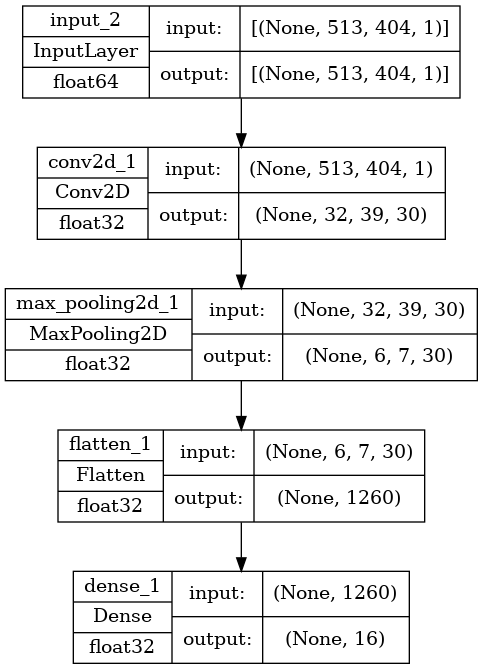

In [44]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype= True)

In [45]:
instrument_df = meta_df[['Path', 'Instrument (in full)']]
dummy_df = pd.get_dummies(instrument_df, columns = ['Instrument (in full)'])
train_df, test_df = train_test_split(dummy_df, train_size = 0.75)
train_df.head(2)

,Path,Instrument (in full)_Accordion,Instrument (in full)_Alto Saxophone,Instrument (in full)_Bass Tuba,Instrument (in full)_Bassoon,Instrument (in full)_Cello,Instrument (in full)_Clarinet in Bb,Instrument (in full)_Contrabass,Instrument (in full)_Flute,Instrument (in full)_French Horn,Instrument (in full)_Guitar,Instrument (in full)_Harp,Instrument (in full)_Oboe,Instrument (in full)_Trombone,Instrument (in full)_Trumpet in C,Instrument (in full)_Viola,Instrument (in full)_Violin
2582,Keyboards/Accordion/ordinario/Acc-ord-B3-ff-N-...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7419,Strings/Viola/tremolo/Va-trem-B3-pp-4c-N.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
def gen():
    df = train_df.copy()
    while True: 
        tmp_df = df.sample(1)
        path = tmp_df['Path'].values[0]
        spec = generate_spec(path, hop_length = hop_length, win_length = win_length,
                                n_fft = n_fft)
        spec = truncate_spec(spec, spec_shape[1])
        spec = np.expand_dims(spec, -1)
        yield spec, np.reshape(tmp_df[list(set(df.columns) - set(['Path']))].values, (16,))
    
def gen_eval():
    df = test_df.copy()
    while True:
        tmp_df = df.sample(1)
        path = tmp_df['Path'].values[0]
        spec = generate_spec(path, hop_length = hop_length, win_length = win_length, n_fft = n_fft)
        spec = truncate_spec(spec, spec_shape[1])
        spec = np.expand_dims(spec, -1)
        yield spec, np.reshape(tmp_df[list(set(df.columns) - set(['Path']))].values, (16,))

In [ ]:
def npy_gen():
    

In [47]:
sample = next(gen())
print(sample[0].shape)
sample[1].shape

(513, 404, 1)


(16,)

In [48]:
BATCH_SIZE = 100

train_generator = (tf.data.Dataset.from_generator(gen, output_types=(tf.complex64, tf.int64), 
                 output_shapes = ((spec_shape[0], spec_shape[1], 1), (16)))).batch(BATCH_SIZE)
eval_generator = (tf.data.Dataset.from_generator(gen_eval, output_types=(tf.complex64, tf.int64), 
                 output_shapes = ((spec_shape[0], spec_shape[1], 1), (16)))).batch(BATCH_SIZE)


In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
print(model.metrics)

[]


In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 39, 30)        120030    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 7, 30)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1260)              0         
                                                                 
 dense_1 (Dense)             (None, 16)                20176     
                                                                 
Total params: 140,206
Trainable params: 140,206
Non-trainable params: 0
_________________________________________________________________


In [51]:
len(train_df)//BATCH_SIZE

99

In [52]:
from datetime import datetime
datetime.now().strftime('%Y%m%d_%H%M%S')


'20220704_164556'

In [53]:
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    f"../models/baseline_checkpoint/{datetime.now().strftime('%Y%m%d_%H%M%S')}_{{epoch:02d}}_model", 
                                                    monitor='val_accuracy')
early_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2)

In [54]:
history = model.fit(train_generator, epochs = 5, verbose=1, steps_per_epoch= 10, 
                    validation_data = eval_generator,
                    validation_steps = 2, validation_freq= 2, 
                    use_multiprocessing=True, workers = 2, callbacks=[ckpt_callback, early_callback])

Epoch 1/5


2022-07-04 16:46:18.499551: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 165801600 exceeds 10% of free system memory.
2022-07-04 16:46:19.441248: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-07-04 16:46:20.164366: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-04 16:46:20.165581: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-04 16:46:20.166118: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-07-04 16:46:20.166924: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-04 16:46:20.167311: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Mod

 1/10 [==>...........................] - ETA: 3:32 - loss: 0.6946 - accuracy: 0.0400

2022-07-04 16:46:57.344220: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 165801600 exceeds 10% of free system memory.


 3/10 [========>.....................] - ETA: 4:10 - loss: 0.5488 - accuracy: 0.0600

2022-07-04 16:47:32.699429: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 165801600 exceeds 10% of free system memory.


 4/10 [===========>..................] - ETA: 3:31 - loss: 0.5176 - accuracy: 0.0800

2022-07-04 16:48:06.975570: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 165801600 exceeds 10% of free system memory.


 5/10 [==============>...............] - ETA: 2:54 - loss: 0.5035 - accuracy: 0.1040

2022-07-04 16:48:40.906145: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 165801600 exceeds 10% of free system memory.


 9/10 [==========================>...] - ETA: 36s - loss: 0.4408 - accuracy: 0.1522 

KeyboardInterrupt: 

In [37]:
# model.save('../models/baseline/')

INFO:tensorflow:Assets written to: ../models/baseline/assets


In [39]:
model = tf.keras.models.load_model('../models/baseline_checkpoint/')

In [38]:
model.save_weights('../models/baseline_checkpoint/20220704_153658_model/')

In [35]:
model.evaluate(eval_generator, steps = len(test_df)//25)

 73/132 [===============>..............] - ETA: 7:28 - loss: 2.0839 - accuracy: 0.0121

KeyboardInterrupt: 

In [ ]:
random_train, random_label = next(gen())

In [ ]:
np.reshape(random_train, (1, 1025, 807, 1))

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]], dtype=float32)

In [ ]:
random_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
model(np.reshape(random_train, (1, 1025, 807, 1)), training= False)

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[0.25098786, 0.28979725, 0.19388774, 0.3408277 , 0.29772896,
        0.41419387, 0.20505759, 0.24066192, 0.49796218, 0.2604622 ,
        0.32297462, 0.41928884, 0.14825433, 0.24044338, 0.35180917,
        0.27159938]], dtype=float32)>